In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline
sns.set()
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)

In [163]:
df=pd.read_csv(r'C:\Users\dorot\Downloads\ML\ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [167]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [169]:
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [171]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

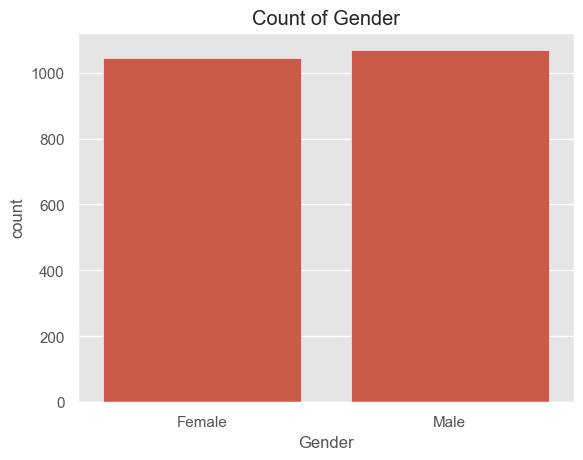

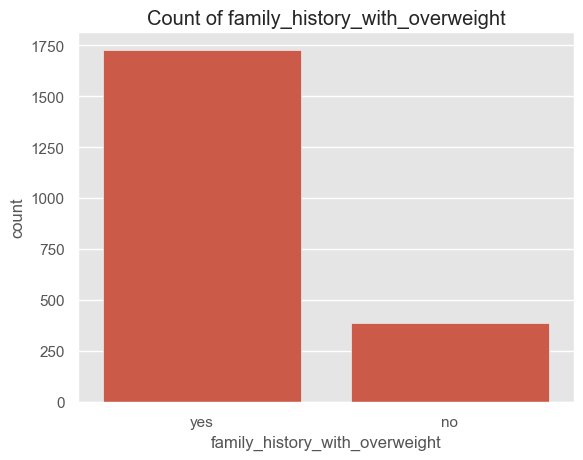

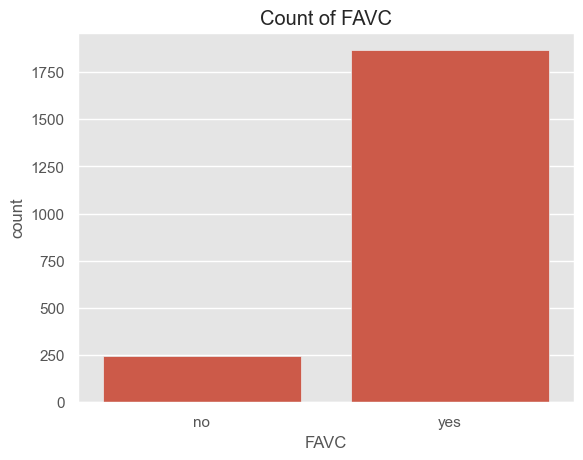

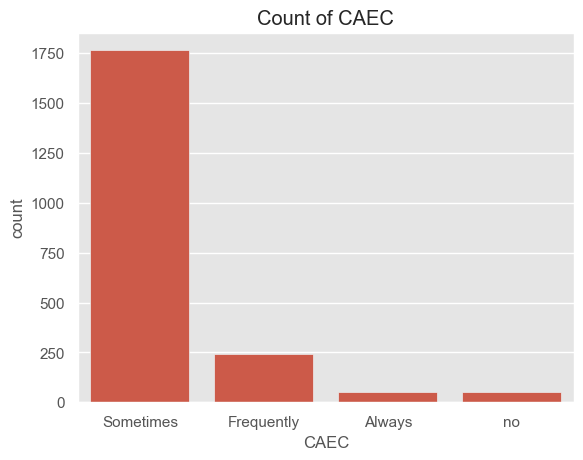

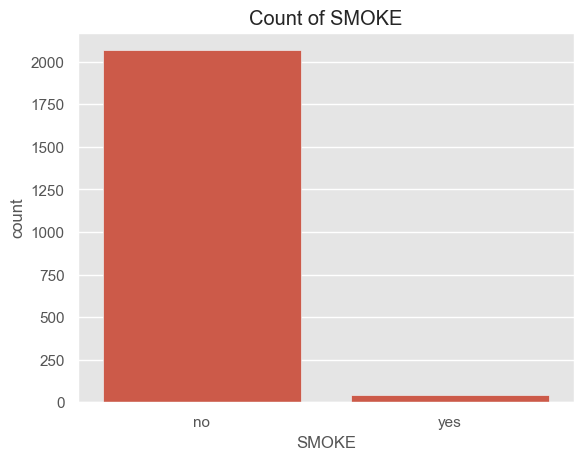

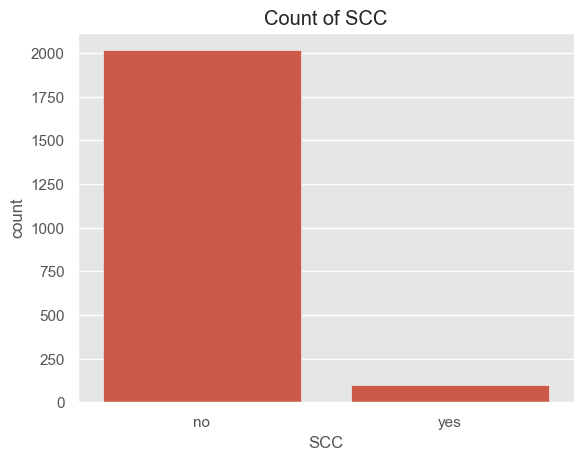

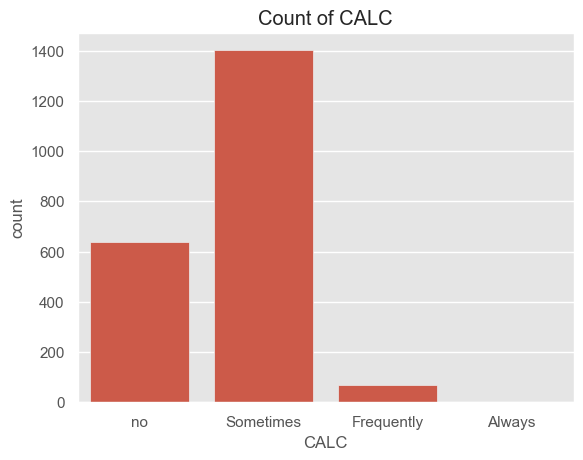

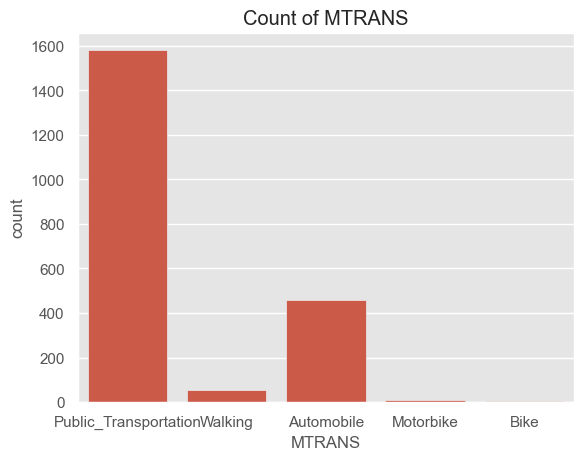

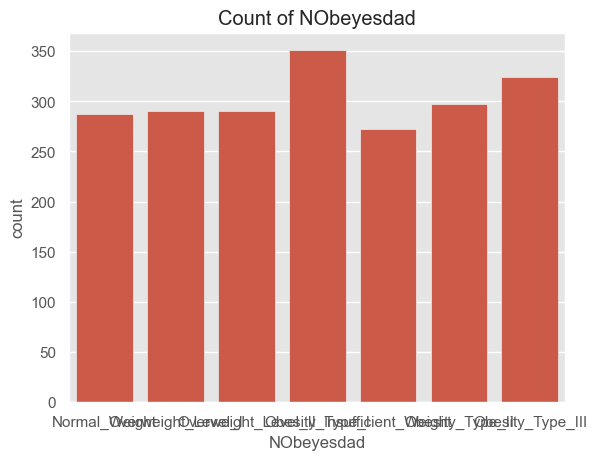

In [173]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    sns.countplot(x=df[col],data=df,legend=False)
    plt.title(f'Count of {col}')
    plt.show()

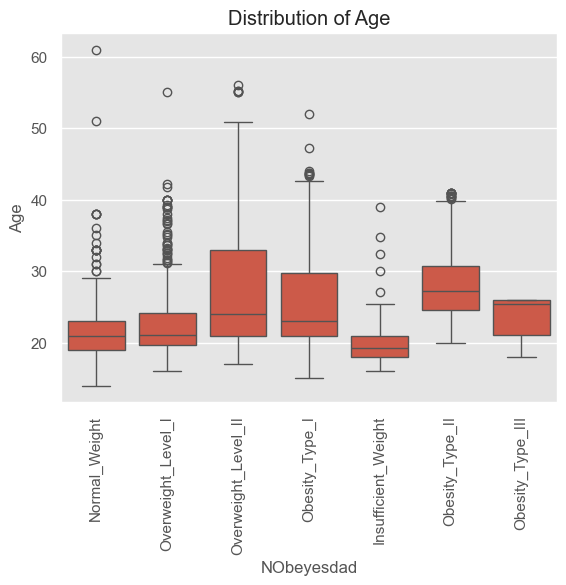

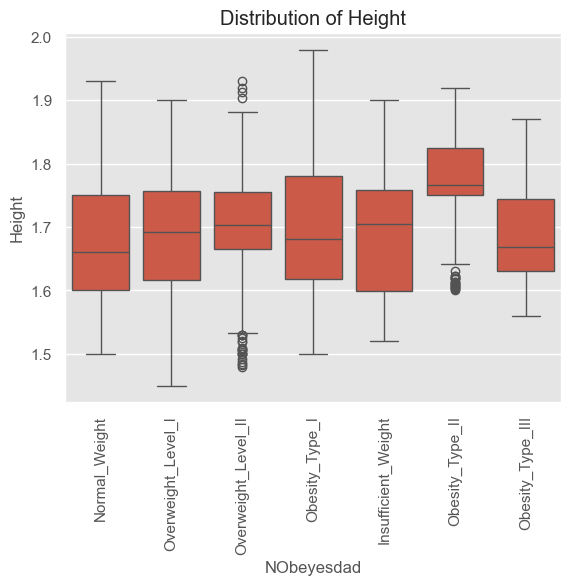

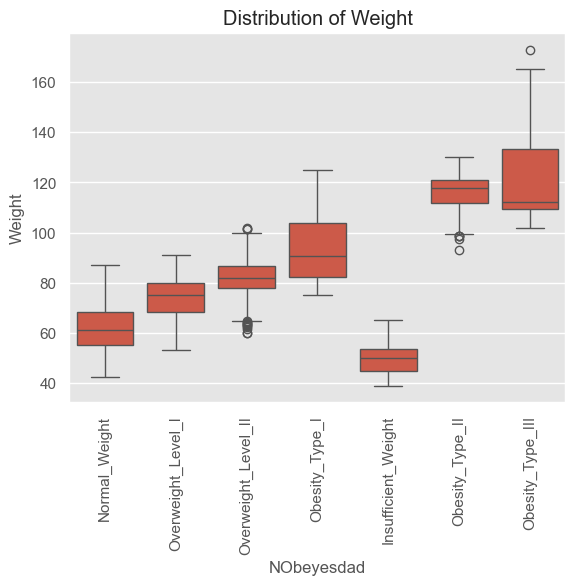

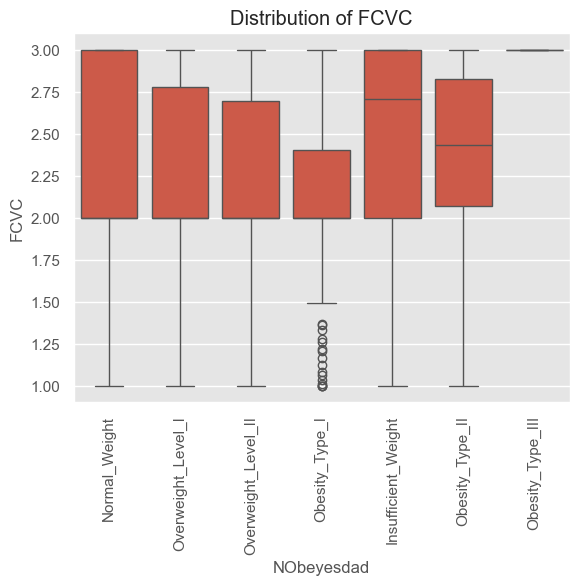

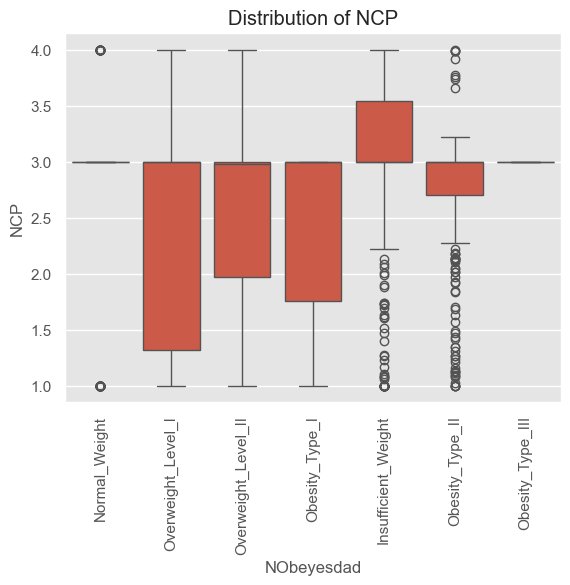

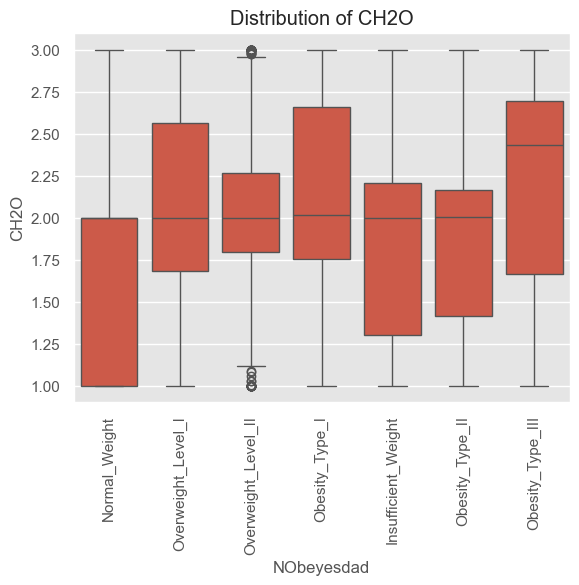

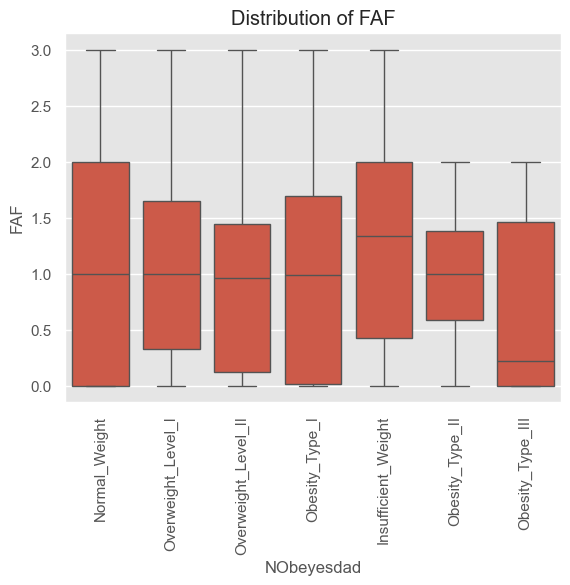

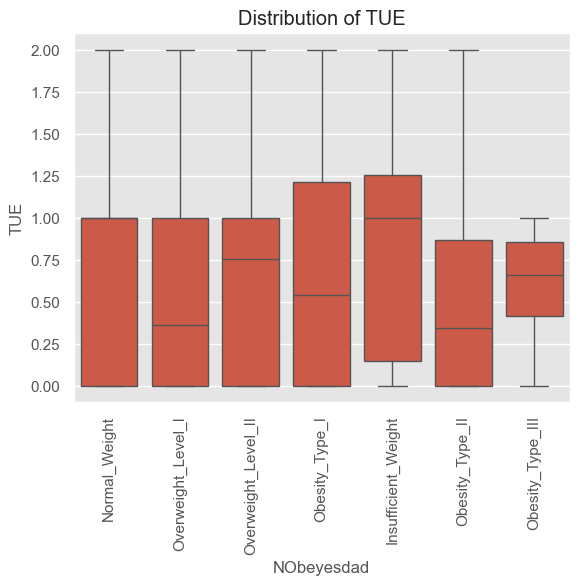

In [21]:
num_cols = df.select_dtypes(include='number' ).columns
for col in num_cols:
    sns.boxplot(x=df['NObeyesdad'],y=df[col],data=df,legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [175]:
df2 = df.copy()
numeric_cols = df2.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

        
    df2 = df2[(df2[col] >= lower_bound) & (df2[col] <= upper_bound)]

df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


In [177]:
yes_no_map = {'yes': 1, 'no': 0}

cols_to_map = ['family_history_with_overweight', 'SMOKE', 'FAVC','SCC']
df2[cols_to_map] = df2[cols_to_map].apply(lambda col: col.map(yes_no_map))
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
5,Male,29.0,1.62,53.0,0,1,2.0,3.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Automobile,Normal_Weight


In [179]:
df2['Gender']=df2['Gender'].map({'Male':0,'Female':1})
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
5,0,29.0,1.62,53.0,0,1,2.0,3.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Automobile,Normal_Weight


In [181]:
le=LabelEncoder()
df2['NObeyesdad']=le.fit_transform(df2['NObeyesdad'])
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,5
5,0,29.0,1.62,53.0,0,1,2.0,3.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Automobile,1


In [183]:
df2['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [185]:
df2['CALC'].unique()

array(['no', 'Sometimes', 'Frequently'], dtype=object)

In [187]:
ordinal_map = [['no', 'Sometimes', 'Frequently', 'Always']]
oe = OrdinalEncoder(categories=ordinal_map)
df2['CAEC'] = oe.fit_transform(df2[['CAEC']])

In [189]:
ordinal_map = [['no', 'Sometimes', 'Frequently']]
oe = OrdinalEncoder(categories=ordinal_map)
df2['CALC'] = oe.fit_transform(df2[['CALC']])

In [191]:
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,Public_Transportation,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,Public_Transportation,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,Public_Transportation,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1.0,0,2.0,0,2.0,0.0,2.0,Walking,5
5,0,29.0,1.62,53.0,0,1,2.0,3.0,1.0,0,2.0,0,0.0,0.0,1.0,Automobile,1


In [197]:
#ohe = OneHotEncoder(sparse_output=False)
#encoded = ohe.fit_transform(df[['MTRANS']])
#encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['MTRANS']))
#df2 = pd.concat([df2, encoded_df], axis=1)
df2.drop('MTRANS',axis=1,inplace=True)
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1.0,0,2.0,0,2.0,0.0,2.0,5
5,0,29.0,1.62,53.0,0,1,2.0,3.0,1.0,0,2.0,0,0.0,0.0,1.0,1


In [193]:
df2.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [195]:
df2.dropna(inplace=True)

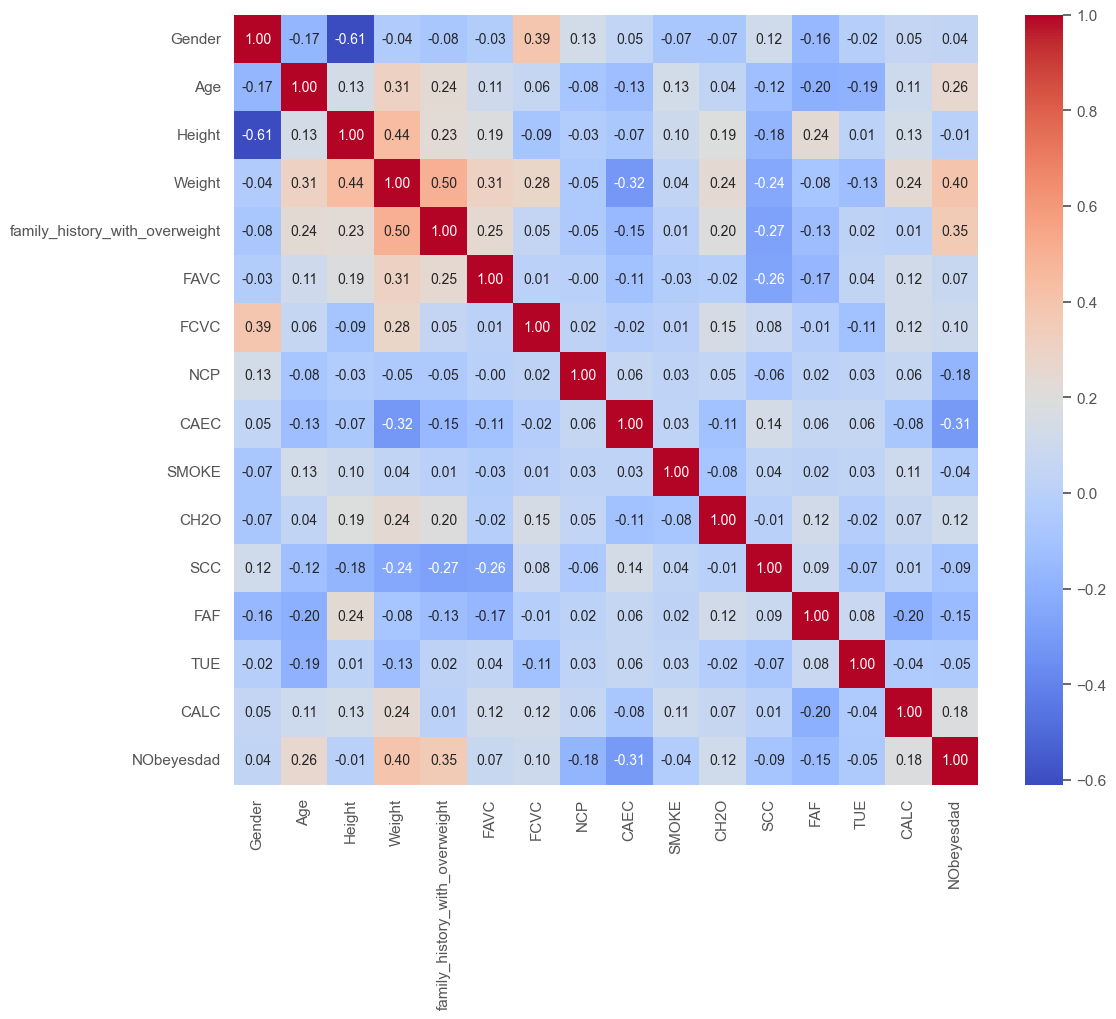

In [199]:
corr=df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

In [201]:
X=df2.drop('NObeyesdad',axis=1)
y=df2['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [203]:
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 90.36
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.83      0.83      0.83        42
           2       0.79      1.00      0.88        26
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        68
           5       0.79      0.76      0.77        29
           6       0.84      0.66      0.74        32

    accuracy                           0.90       280
   macro avg       0.88      0.88      0.88       280
weighted avg       0.90      0.90      0.90       280



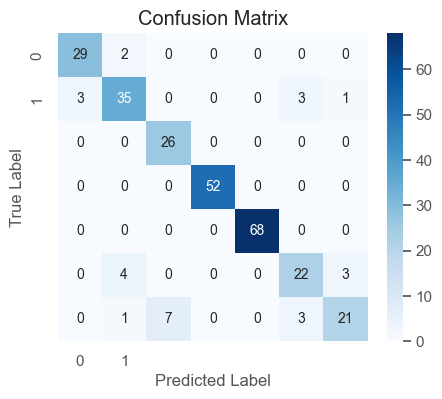

In [205]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [207]:
param_grid_rf = [{
    'n_estimators': [100, 300],
    'max_depth': [ 4, 8, 12],
    'min_samples_split': [6, 8, 12],
    'criterion': ['entropy', 'gini'],
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}]
}]

rf=RandomForestClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [209]:
grid_search=GridSearchCV(rf,param_grid_rf,cv=cv,scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)


0.9338142734968818
{'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 6, 'n_estimators': 300}


Accuracy: 94.29
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        31
           1       0.75      1.00      0.86        42
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        68
           5       1.00      0.79      0.88        29
           6       0.93      0.84      0.89        32

    accuracy                           0.94       280
   macro avg       0.95      0.93      0.93       280
weighted avg       0.95      0.94      0.94       280



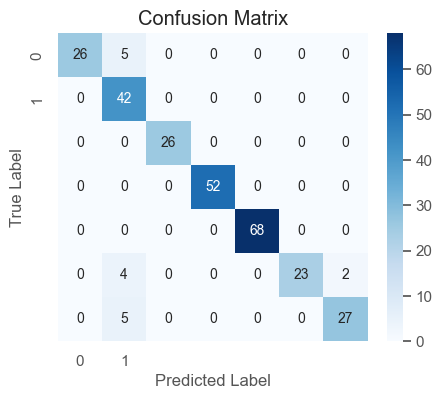

In [213]:
rf=RandomForestClassifier(class_weight= {0: 1, 1: 3}, criterion= 'gini', max_depth= 12, min_samples_split= 6, n_estimators= 300)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

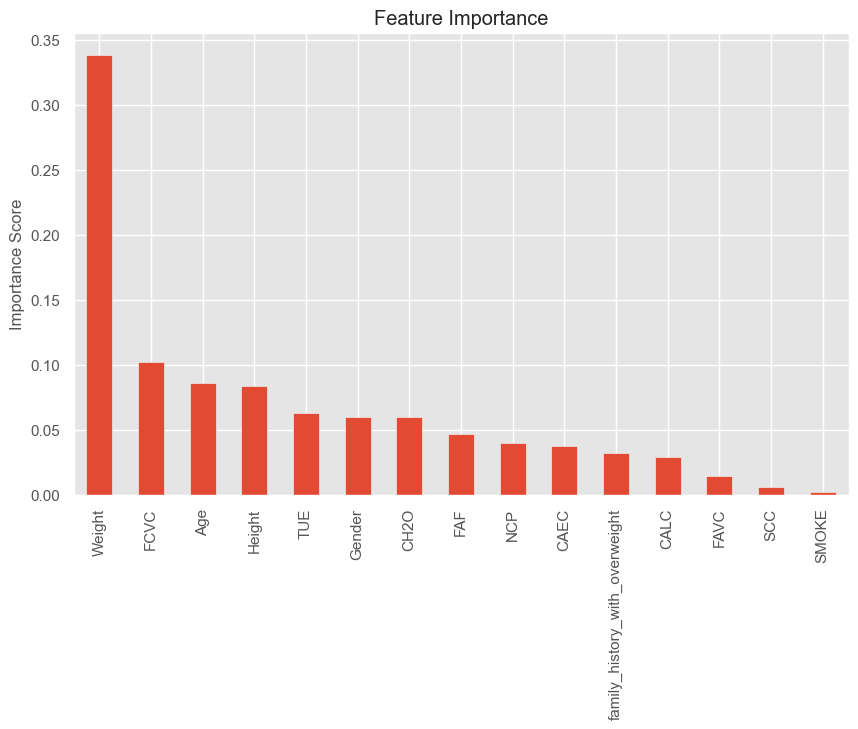

In [221]:
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

In [223]:
param_grid = [{
    'splitter':['best','random'],
    'max_depth':[2,4,8,12],
    'min_samples_split':[6,8,10,12],
    'criterion':['entropy','gini'],
    'class_weight': [{0: 1, 1: 2},{0: 1, 1: 3}]
}]

dtc=DecisionTreeClassifier()

In [225]:
grid_search=GridSearchCV(dtc,param_grid,cv=cv,scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9311309060509095
{'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 6, 'splitter': 'best'}


Accuracy: 95.0
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.90      0.88      0.89        42
           2       1.00      0.96      0.98        26
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        68
           5       0.89      0.86      0.88        29
           6       0.86      0.97      0.91        32

    accuracy                           0.95       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.95      0.95      0.95       280



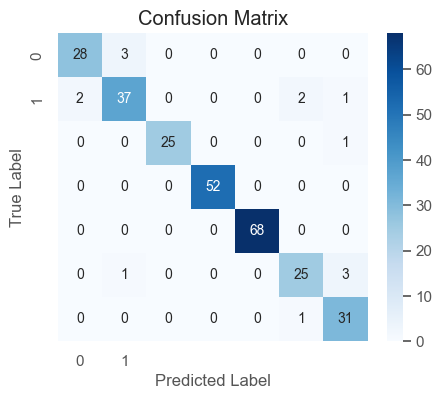

In [227]:
dtc=DecisionTreeClassifier(class_weight= {0: 1, 1: 2}, criterion= 'entropy', max_depth= 12, min_samples_split= 6, splitter= 'best')
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

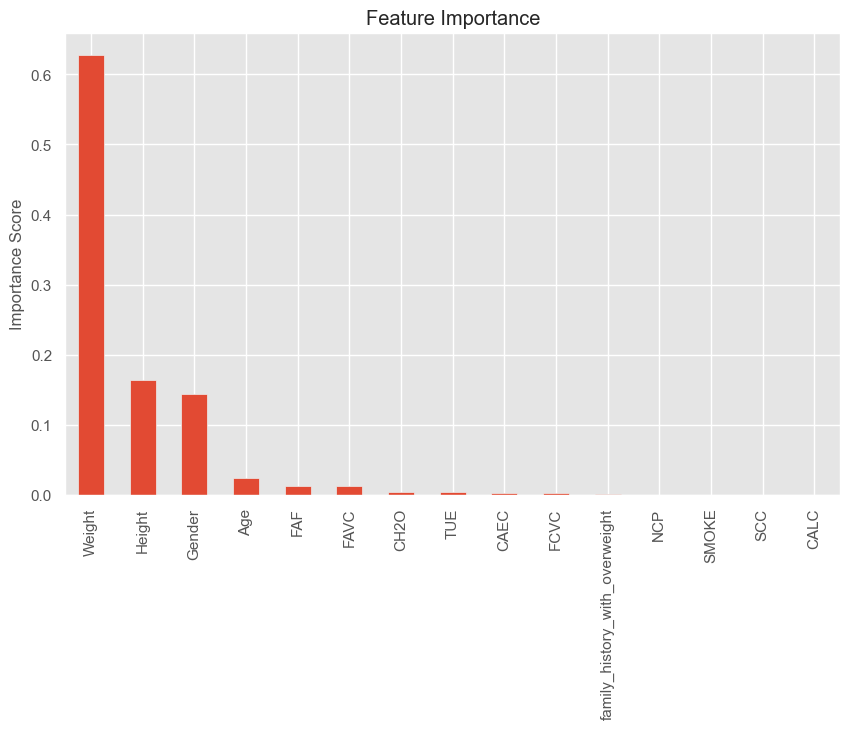

In [229]:
importances = dtc.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()